In [2]:
# antes de empezar la clase deberemos instalarnos dos librerías para poder realizar la lección
#!pip install matplotlib
#!pip install seaborn

In [1]:
# importamos las librerías que necesitamos

# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd

# Visualización
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

In [2]:
# lo primero que hacemos es cargar el dataframe que vamos a usar para esta lección
df = pd.read_csv("bank-additional-clean-nonulls.csv") 
df.head()

,income,kidhome,teenhome,dt_customer,numwebvisitsmonth,id,job,marital,education,default,housing,loan,contact,duration,campaign,previous,poutcome,empvarrate,conspriceidx,consconfidx,nremployed,y,date,latitude,longitude,contact_month,contact_year,age_cat,hijos_totales,age,euribor3m,pdays
0,161770.0,1.0,0.0,2012-04-04,29.0,089b39d8-e4d0-461b-87d4-814d71e0e079,housemaid,married,basic 4y,No,No,No,telephone,261,1,0,nonexistent,1.1,93.994,-36.4,5191,no,2-agosto-2019,41.495,-71.233,agosto,2019.0,Adultos mayores,1.0 hijos,40.005436,4.857000,4.4
1,85477.0,1.0,1.0,2012-12-30,7.0,e9d37224-cb6f-4942-98d7-46672963d097,services,married,high school,No,No,No,telephone,149,1,0,nonexistent,1.1,93.994,-36.4,5191,no,14-septiembre-2016,34.601,-83.923,septiembre,2016.0,Mediana edad,2.0 hijos,57.000000,3.603174,4.8
2,147233.0,1.0,1.0,2012-02-02,5.0,3f9f49b5-e410-4948-bf6e-f9244f04918b,services,married,high school,No,Si,No,telephone,226,1,0,nonexistent,1.1,93.994,-36.4,5191,no,15-febrero-2019,34.939,-94.847,febrero,2019.0,Adultos jóvenes,2.0 hijos,37.000000,4.857000,7.0
3,121393.0,1.0,2.0,2012-12-21,29.0,9991fafb-4447-451a-8be2-b0df6098d13e,admin.,married,basic 6y,No,No,No,telephone,151,1,0,nonexistent,1.1,93.994,-36.4,5191,no,29-noviembre-2015,49.041,-70.308,noviembre,2015.0,Mediana edad,3.0 hijos,40.000000,3.595488,2.8
4,63164.0,1.0,2.0,2012-06-20,20.0,eca60b76-70b6-4077-80ba-bc52e8ebb0eb,services,married,high school,No,No,Si,telephone,307,1,0,nonexistent,1.1,93.994,-36.4,5191,no,29-enero-2017,38.033,-104.463,enero,2017.0,Mediana edad,3.0 hijos,56.000000,3.602722,5.8


# Análisis de variables numéricas

En este notebook vamos a analizar las variables numéricas del dataset

Vamos a plantear algunas preguntas que nos van a ayudar a decir que tipo de gráfica podemos o debemos usar, en este caso intentaremos contestar a las siguientes preguntas: 

- ¿Cómo se distribuyen las edades de los individuos en el conjunto de datos? Histograma de la variable "age": Esta gráfica mostraría la distribución de las edades de los individuos en el DataFrame, lo que nos permitiría obtener información sobre la dispersión y la forma de la distribución.


- ¿Existe alguna relación entre la edad y el número de días que han pasado desde el último contacto? Gráfico de dispersión entre las variables "age" y "pdays": Este gráfico nos permitiría explorar la relación entre la edad y el tiempo de contacto. Esto podría ayudarnos a identificar posibles patrones o correlaciones entre estas variables.



- ¿Existen valores atípicos en la cantidad de contactos realizados durante la campaña publicitaria? Boxplot de la variable "campaign": Este gráfico nos ayudaría a identificar la distribución de la cantidad de contactos realizados durante la campaña publicitaria, así como a identificar posibles valores atípicos.


Estas son solo algunas de las preguntas que podríamos contestar, pero sientete libre de probar con otras variables numéricas y ver como se verían sus gráficas para seguir aprendiendo. 






In [3]:
df.head()

,income,kidhome,teenhome,dt_customer,numwebvisitsmonth,id,job,marital,education,default,housing,loan,contact,duration,campaign,previous,poutcome,empvarrate,conspriceidx,consconfidx,nremployed,y,date,latitude,longitude,contact_month,contact_year,age_cat,hijos_totales,age,euribor3m,pdays
0,161770.0,1.0,0.0,2012-04-04,29.0,089b39d8-e4d0-461b-87d4-814d71e0e079,housemaid,married,basic 4y,No,No,No,telephone,261,1,0,nonexistent,1.1,93.994,-36.4,5191,no,2-agosto-2019,41.495,-71.233,agosto,2019.0,Adultos mayores,1.0 hijos,40.005436,4.857000,4.4
1,85477.0,1.0,1.0,2012-12-30,7.0,e9d37224-cb6f-4942-98d7-46672963d097,services,married,high school,No,No,No,telephone,149,1,0,nonexistent,1.1,93.994,-36.4,5191,no,14-septiembre-2016,34.601,-83.923,septiembre,2016.0,Mediana edad,2.0 hijos,57.000000,3.603174,4.8
2,147233.0,1.0,1.0,2012-02-02,5.0,3f9f49b5-e410-4948-bf6e-f9244f04918b,services,married,high school,No,Si,No,telephone,226,1,0,nonexistent,1.1,93.994,-36.4,5191,no,15-febrero-2019,34.939,-94.847,febrero,2019.0,Adultos jóvenes,2.0 hijos,37.000000,4.857000,7.0
3,121393.0,1.0,2.0,2012-12-21,29.0,9991fafb-4447-451a-8be2-b0df6098d13e,admin.,married,basic 6y,No,No,No,telephone,151,1,0,nonexistent,1.1,93.994,-36.4,5191,no,29-noviembre-2015,49.041,-70.308,noviembre,2015.0,Mediana edad,3.0 hijos,40.000000,3.595488,2.8
4,63164.0,1.0,2.0,2012-06-20,20.0,eca60b76-70b6-4077-80ba-bc52e8ebb0eb,services,married,high school,No,No,Si,telephone,307,1,0,nonexistent,1.1,93.994,-36.4,5191,no,29-enero-2017,38.033,-104.463,enero,2017.0,Mediana edad,3.0 hijos,56.000000,3.602722,5.8


Recordemos que este conjunto de datos proporciona información sobre campañas de marketing realizadas por un banco y si los clientes suscribieron o no un producto o servicio ofrecido durante esas campañas. Las variables que teníamos en este conjunto de datos son: 

- **age**: Representa la edad de la persona.

- **job**: Indica el tipo de empleo o profesión de la persona.

- **marital**: Describe el estado civil de la persona (soltero, casado, divorciado, etc.).

- **education**: Representa el nivel de educación alcanzado por la persona.

- **default**: Indica si la persona tiene algún incumplimiento crediticio o de pago.

- **housing**: Muestra si la persona tiene una hipoteca o préstamo hipotecario.

- **loan**: Indica si la persona tiene otro tipo de préstamo.

- **contact**: Describe el método de contacto utilizado para comunicarse con la persona (por ejemplo, teléfono, celular, etc.).

- **duration**: Representa la duración (en segundos) del último contacto realizado durante la campaña de marketing.

- **campaign**: Indica el número de contactos realizados durante la campaña para esta persona.

- **pdays**: Muestra el número de días transcurridos desde el último contacto.

- **previous**: Indica el número de contactos realizados antes de la campaña actual para esta persona.

- **poutcome**: Describe el resultado de la campaña de marketing anterior.

- **emp.var.rate**: Representa la tasa de variación del empleo en un período determinado.

- **cons.price.idx**: Muestra el índice de precios al consumidor.

- **cons.conf.idx**: Indica el índice de confianza del consumidor.

- **euribor3m**: Representa la tasa de interés promedio a tres meses.

- **nr.employed**: Muestra el número de empleados.

- **y**: Indica si la persona ha suscrito un producto o servicio ofrecido durante la campaña ("yes" o "no").

- **date**: Representa la fecha del último contacto durante la campaña.



## Histograma o *histplot*

Usaremos un histograma cuando deseemos representar la distribución de una variable numérica. Cuando se trabaja con datos numéricos, es importante comprender cómo se distribuyen los valores y qué patrones o tendencias pueden estar presentes en los datos. 


Veamos como se hace esta visualización son seaborn:

```python

sns.histplot(data, x="variable", bins=10, kde=False, color="blue")
```

En este ejemplo de gráfica contestaremos a la primera pregunta que planteamos: 

> ¿Cómo se distribuyen las edades de los individuos en el conjunto de datos? Histograma de la variable "age": Esta gráfica mostraría la distribución de las edades de los individuos en el DataFrame, lo que nos permitiría obtener información sobre la dispersión y la forma de la distribución.

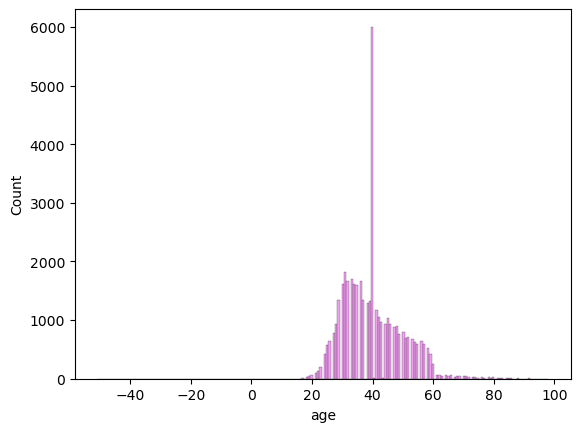

In [4]:
# creamos nuestra primera gráfica, en este caso queremos saber como están distribuidas las edades entre nuestros clientes
# para ello usamos el método 'sns.histplot', en este caso le hemos cambiado el color por defecto usando el parámetro 'color' 
sns.histplot(x = "age", data = df, color = "violet");

Hemos realizado nuestra primera gráfica, pero este método tenía otros parámetros, veamos como podemos seguir modificando esta gráfica con esos parámetros

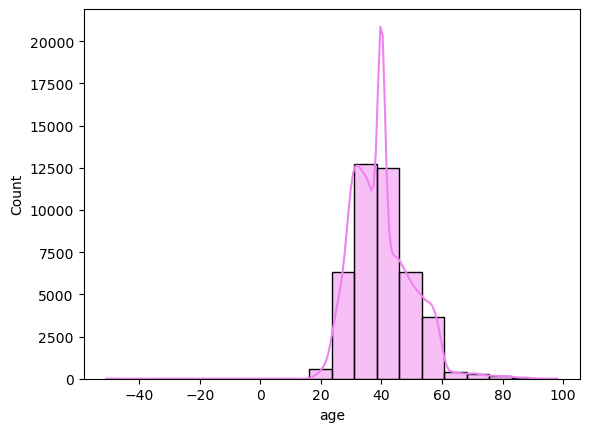

In [5]:
# en este caso seguimos haciendo la misma gráfica, pero le hemos añadido el 'kde' que no es más que una línea que nos muestra el patrón que siguen nuestros datos
# y hemos añadido los 'bins' que lo que hace es añadir el número de barras en nuestra visualización que le indicamos
sns.histplot(x = "age", 
             data = df, 
             color = "violet", 
             kde = True, 
             bins = 20 );

**¿Cómo podemos interpretar esta gráfica?**

En el eje x tenemos los grupos de edad que hemos generado automáticamente con los bins, y en el eje y el conteo del total de gente se ha contactado (el número de personas a las que se ha llamado)

- Las personas contactadas no son menores de 10-20 años. 

- Se contactan muy pocas personas a partir de los 60 años. 

- La mayoría de los contactos se hacen en personas de ente 30 -50 años. 

Si nos vamos a las tablas que teníamos al inicio, vemos que esta misma gráfica la podemos hacer usando la librería de matplotlib. Su sintaxis básica es:
```python
plt.hist(x, bins=None, range=None, density=False, cumulative=False, color=None, edgecolor=None)
```
Los parámetros principales:

- `x`: Los datos numéricos que se utilizarán para crear el histograma.

- `data`: El DataFrame o la Serie que contiene los datos.

- `bins`: Especifica el número de contenedores (bins) en los que se dividirán los datos. También se puede proporcionar una secuencia de valores que representan los bordes de los bins.

- `range`: Especifica el rango de valores que se considerarán en el histograma. Se lo tendremos que pasar como lista, indicando el valor mínimo y máximo que queremos en el eje x. 

- `density`: Si se establece en True, el histograma mostrará densidades en lugar de frecuencias.

- `cumulative`: Si se establece en True, el histograma mostrará una distribución acumulativa en lugar de una distribución normal.

- `color`: Color de las barras del histograma. Podremos usar los mismos que en seaborn. 

- `edgecolor`: Color del borde de las barras del histograma.

Además de los argumentos mencionados, hay muchos otros argumentos opcionales que se pueden utilizar para personalizar el histograma, como el grosor de las barras, la transparencia, la orientación, entre otros.



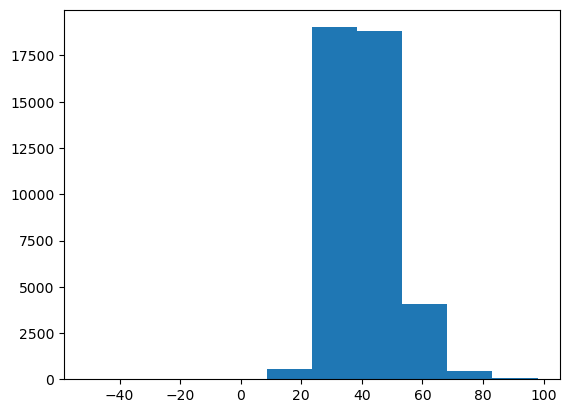

In [6]:
# empecemos construyendo una gráfica básica con matplotlib
# a priori, la gráfica es igual, solo que con una apariencia un poco diferente. 
# La principal diferencia es que no tenemos los nombres de los ejes que si teníamos en la gráfica de seaborn (age y count)
plt.hist(x = "age", 
         data = df);

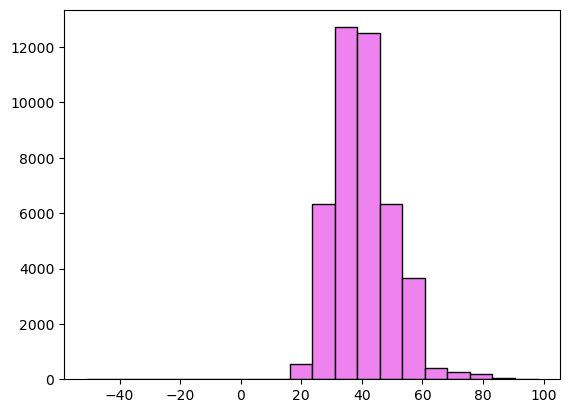

In [7]:
# modifiquemos un poco la gráfica con algunos de sus parámetros
# en este caso hemos añadido los 'bins', el 'color' y el 'edgecolor', de forma similar a como lo hicimos en seaborn
plt.hist(x = "age", 
         data = df, 
         bins = 20, 
         color = "violet", 
         edgecolor = "black");

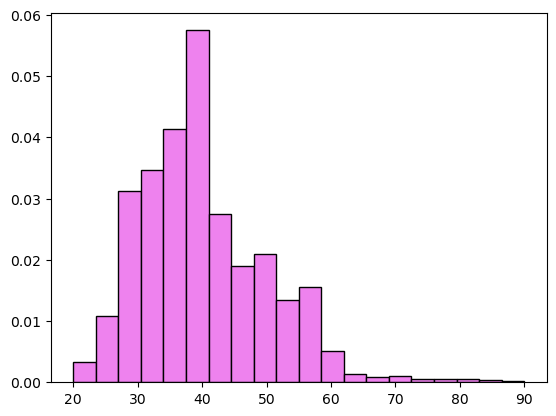

In [8]:
# hagamos la última modificación sobre este gráfica
# en este caso hemos añadido el parámetro 'range' y fijaos como los valores del eje x han cambiado respecto a la gráfica anterior
# además, hemos establecido el parámetro 'density' en True, y observamos como ha cambiado. Las diferencias que hay entre estas opciones las tenéis descritas en la siguiente celda
plt.hist(x = "age", 
         data = df, 
         bins = 20, 
         color = "violet", 
         edgecolor = "black", 
         density = True, 
         range = [20, 90]);

***¿Cuál es la diferencia entre frecuencia y densidad?***

En un histograma, tanto la densidad como la frecuencia son dos formas de representar la distribución de datos, pero difieren en la escala utilizada en el eje y y el significado asociado a cada una:

- **Frecuencia**: Muestra el recuento o la cantidad de observaciones que caen en cada bin o intervalo. La frecuencia indica cuántas veces aparece una determinada categoría. En este caso, la altura de las barras representa el número de observaciones en cada bin.

- **Densidad**: Muestra la proporción relativa de observaciones en cada bin en relación con el tamaño total de los datos. En lugar de mostrar el recuento absoluto, la densidad muestra la probabilidad relativa de que una observación pertenezca a un bin específico.

La siguiente pregunta que nos podríamos hacer es como podemos añadir un "nombre" a los ejes de las gráficas de matplotlib, para eso tendremos que usar los métodos `plt.xlabel()` y `plt.ylabel()`. 


1. `plt.xlabel('Etiqueta del eje x')`: Este método se utiliza para agregar una etiqueta al eje x del gráfico. Permite especificar el texto que se mostrará como etiqueta en el eje x. Su sintaxis básica es:

    ```python
    plt.xlabel('Etiqueta del eje x') # 'Etiqueta del eje x' es el texto que deseas mostrar como etiqueta del eje x.
    ```



2. `plt.ylabel('Etiqueta del eje y')`: Este método se utiliza para agregar una etiqueta al eje y del gráfico. Permite especificar el texto que se mostrará como etiqueta en el eje y.Su sintaxis es:

    ```python
    plt.ylabel('Etiqueta del eje y') # 'Etiqueta del eje y'` es el texto que deseas mostrar como etiqueta del eje y.
    ```

Veamos como debemos hacerlo:

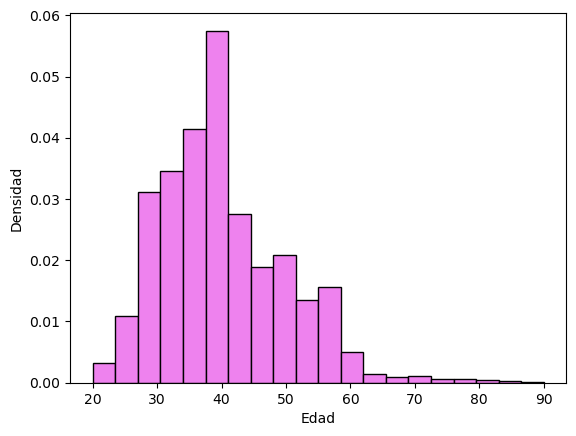

In [9]:
# replicamos la última gráfica que hemos hecho
plt.hist(x = "age", 
         data = df, 
         bins = 20, 
         color = "violet", 
         edgecolor = "black", 
         density=True, 
         range = [20, 90])

# añadimos el método 'plt.xlabel()' para ponerle nombre al eje x
plt.xlabel("Edad")

# añadimos el método 'plt.ylabel()' para ponerlo nombre al eje y
plt.ylabel("Densidad");

📌 **NOTA** Seaborn y matplotlib comparten algunos de sus métodos, principalmente los de la modificación del estilo de las gráficas. En este sentido, estos dos últimos métodos que hemos visto `plt.xlabel()` y `plt.ylabel()` se pueden combinar también con una gráfica de seaborn, y los utilizaremos de la misma forma. 

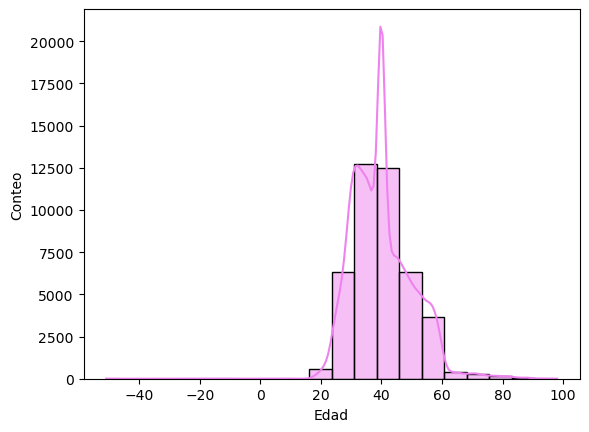

In [10]:
# creamos la gráfica de seaborn
sns.histplot(x = "age", 
             data = df, 
             color = "violet", 
             kde = True, 
             bins = 20 )

# usando 'plt.xlabel()' cambiamos el nombre del eje x
plt.xlabel("Edad")

# usando el método 'plt.ylabel()' cambiamos el nombre del eje y
plt.ylabel("Conteo");

## Gráfico de dispersión o *scatterplot*

Usaremos este tipo de gráficas para identificar patrones, tendencias o correlaciones entre las dos variables. Puede ayudar a responder preguntas como: ¿existe una relación lineal entre las variables? ¿Hay una relación positiva o negativa? ¿Existen valores atípicos o puntos que se desvíen de la tendencia general?

De nuevo, usando la librería de seaborn, su sintaxis básica es:

```python
sns.scatterplot(x, y, data, hue, style, size)
```

In [13]:
# recordemos el DataFrame
df.head(1)

,income,kidhome,teenhome,dt_customer,numwebvisitsmonth,id,job,marital,education,default,housing,loan,contact,duration,campaign,previous,poutcome,empvarrate,conspriceidx,consconfidx,nremployed,y,date,latitude,longitude,contact_month,contact_year,age_cat,hijos_totales,age,euribor3m,pdays
0,161770.0,1.0,0.0,2012-04-04,29.0,089b39d8-e4d0-461b-87d4-814d71e0e079,housemaid,married,basic 4y,No,No,No,telephone,261,1,0,nonexistent,1.1,93.994,-36.4,5191,no,2-agosto-2019,41.495,-71.233,agosto,2019.0,Adultos mayores,1.0 hijos,40.005436,4.857,4.4


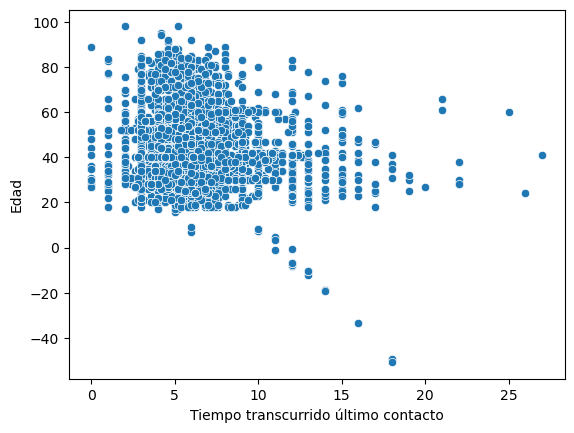

In [11]:
# creamos una gráfica básica usando 'sns.scatterplot()' 
# como ya lo hemos aprendido, vamos a cambiar el nombre de los ejes usando los métodos 'plt.xlabel()'  y 'plt.ylabel()' 
sns.scatterplot(x = "pdays", 
                y = "age", 
                data = df)

# cambiamos los nombres de los ejes
plt.xlabel("Tiempo transcurrido último contacto")
plt.ylabel("Edad");

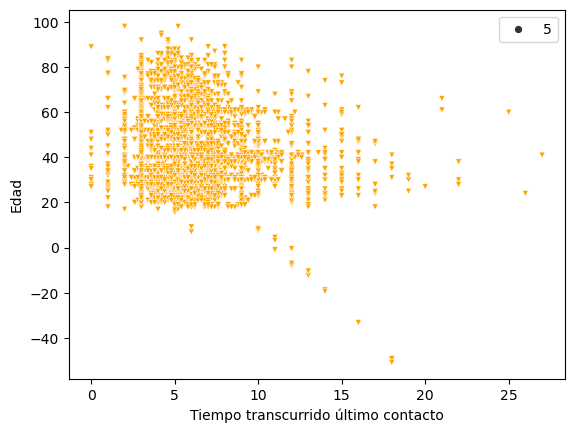

In [14]:
# sigamos modificando la gráfica con otros parámetros
# en este caso hemos añadido el parámetro 'size' que nos permite hacer los puntos más grandes o pequeños
# además, hemos añadido el parámetro 'marker', que nos permite cambiar el tipo marcador de la gráfica
sns.scatterplot(x = "pdays", 
                y = "age", 
                data = df, 
                size = 5, 
                marker= "v", 
                color = "orange")


# cambiamos los nombres de los ejes
plt.xlabel("Tiempo transcurrido último contacto")
plt.ylabel("Edad");

**¿Cómo podemos interpretar esta gráfica?**

Estas gráficas las usamos para buscar tendencias en los datos, por lo tanto, tendremos que buscar tendencias en las nubes de puntos que tenemos en la gráfica. En este caso concreto no vemos que la nube de punto tienda hacía arriba o hacía abajo, por lo que podríamos decir que no hay ninguna relación entre la edad y el tiempo transcurrido desde el último contacto. Es decir, que independientemente de la edad, no se llama a unos clientes antes que a otros. 

Para hacer esta misma gráfica con matplotlib usaremos el método `plt.scatter()`. Su sintaxis básica es:

```python
plt.scatter(x, y, s=None, c=None, marker=None, cmap=None, ...)
```

Los parámetros principales son:

- `x` y `y`: Los valores numéricos que se utilizarán para el eje x e y respectivamente. 

- `data`: El DataFrame o la Serie que contiene los datos.

- `s` (opcional): El tamaño de los puntos en el gráfico de dispersión. Puede ser un valor numérico o una lista/arreglo de valores para especificar tamaños individuales para cada punto.

- `c` (opcional): El color de los puntos en el gráfico de dispersión. 

- `marker` (opcional): El marcador utilizado para representar los puntos en el gráfico. Podremos usar los mismo que en Seaborn

- `cmap` (opcional): El mapa de colores utilizado para mapear los valores de `c` a colores en el gráfico. Puede ser un mapa de colores predefinido o personalizado.


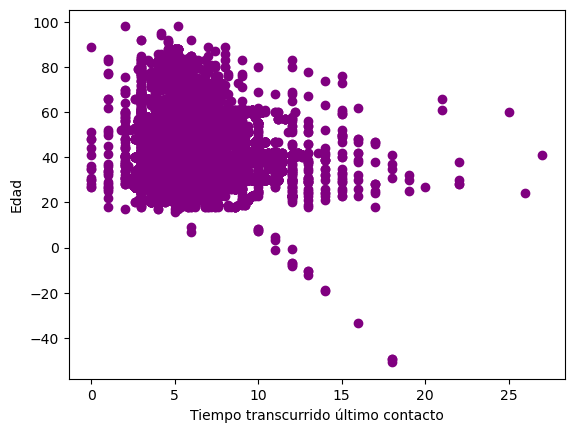

In [13]:
# hacemos un gráfico inicial, cambiando solo el color de los puntos con el parámetro 'c'. 
plt.scatter(x = "pdays", 
            y = "age", 
            data = df, 
            c = "purple" )

# ponemos los nombres de los ejes
plt.xlabel("Tiempo transcurrido último contacto")
plt.ylabel("Edad");

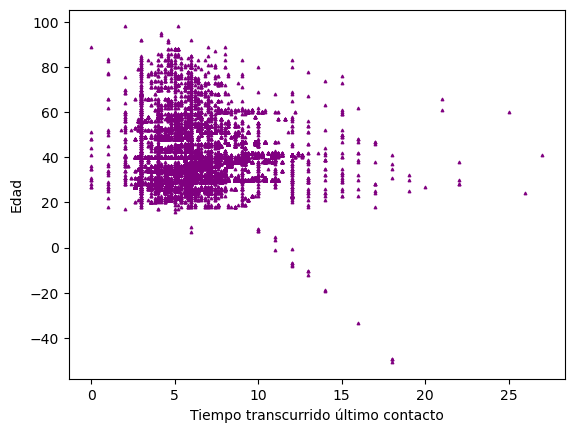

In [15]:
# modificamos la gráfica anterior añadiendo el parámetro 's' para cambiar el tamaño de los puntos
# además, también vamos a cambiar el marcador haciendo uso del parámetro 'marker' 
plt.scatter(x = "pdays", 
            y = "age", 
            data = df, 
            c = "purple", 
            s = 3, 
            marker = "^" )

# ponemos los nombres de los ejes
plt.xlabel("Tiempo transcurrido último contacto")
plt.ylabel("Edad");

En el histograma (`histplot`) aprendimos a como cambiar los nombres de los ejes, y vimos que los métodos valían tanto para matplotlib como para seaborn. Es el momento de aprender como ponerle título a nuestras gráficas. Para eso usaremos el método `plt.title()`. La sintaxis básica del método `plt.title()` es :

```python
plt.title('Texto del título') # `Texto del título` es el texto que deseas mostrar como título en el gráfico
```

📌 **NOTA** Aunque este método lo estamos explicando  en el 'scatterplot' se puede aplicar a cualquiera de las gráficas que veremos, tanto en Seaborn como en Matplotlib. 

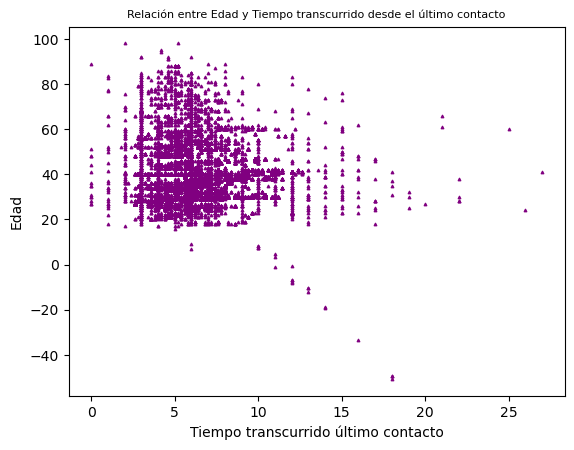

In [16]:
# modificamos la gráfica anterior añadiendo el parámetro 's' para cambiar el tamaño de los puntos
# además también vamos a cambiar el marcador haciendo uso del parámetro 'marker' 
plt.scatter(x = "pdays", 
            y = "age", 
            data = df, 
            c = "purple", 
            s = 3, 
            marker = "^" )

# ponemos los nombres de los ejes
plt.xlabel("Tiempo transcurrido último contacto")
plt.ylabel("Edad")

# ponemos un título usando el método 'plt.title()'
# en este caso lo que hemos añadido es al parámetro 'fontsize' que nos permite cambiar el tamaño del título
plt.title("Relación entre Edad y Tiempo transcurrido desde el último contacto", fontsize = 8);

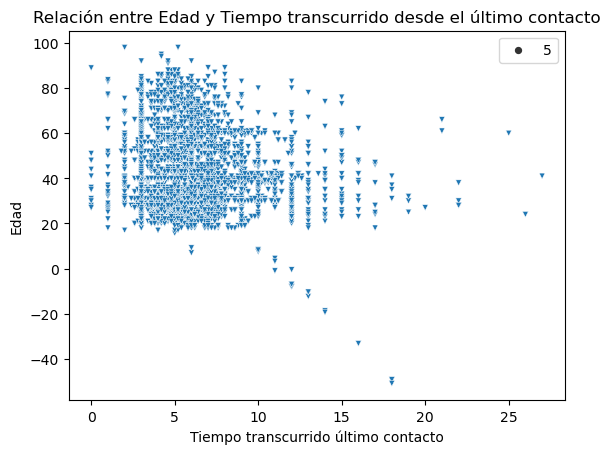

In [17]:
# vamos a ponerle título a la gráfica de dispersión que habíamos hecho con seaborn. 
sns.scatterplot(x = "pdays", 
                y = "age", 
                data = df, 
                size = 5, 
                marker= "v")

# cambiamos los nombres de los ejes
plt.xlabel("Tiempo transcurrido último contacto")
plt.ylabel("Edad")

# le ponemos título a la gráfica de seaborn usando el método 'plt.title()'
plt.title("Relación entre Edad y Tiempo transcurrido desde el último contacto");

## Gráfico de regresión o *regplot*


Al igual que el *scatter plot* usaremos este tipo de gráficas cuando queramos explorar la relación entre dos variables numéricas y al mismo tiempo, ver cómo se ajusta una línea de regresión lineal a esos datos. Es útil para identificar la dirección y la fuerza de la relación entre las variables, y para evaluar si existe una correlación lineal entre ellas.

Su sintaxis básica es:


```python
sns.regplot(x, y, data, markers)
```

- `x`: Especifica el nombre de la columna que se colocará en el eje x (horizontal). 

- `y`: Indica el nombre de la columna que se colocará en el eje y (vertical). 

- `data`: Es el DataFrame que contiene tus datos. 

- `markers` (opcional): Permite cambiar los puntos por otro tipo de marcador en la gráfica. Podremos usar los mismos que en el *scatterplot*. 

- `color` (opcional): Nos permite cambiar el color de los puntos de la gráfica. 

Para ver las diferencias con el *scatter plot*, vamos a usar la misma pregunta que en el ejemplo anterior.


> ¿Existe alguna relación entre la edad y el número de días que han pasado desde el último contacto? Gráfico de dispersión entre las variables "age" y "pdays": Este gráfico nos permitiría explorar la relación entre la edad y el tiempo de contacto. Esto podría ayudarnos a identificar posibles patrones o correlaciones entre estas variables.

📌 **NOTA** Para este tipo de gráfico no tenemos método en `matplotlib`. 

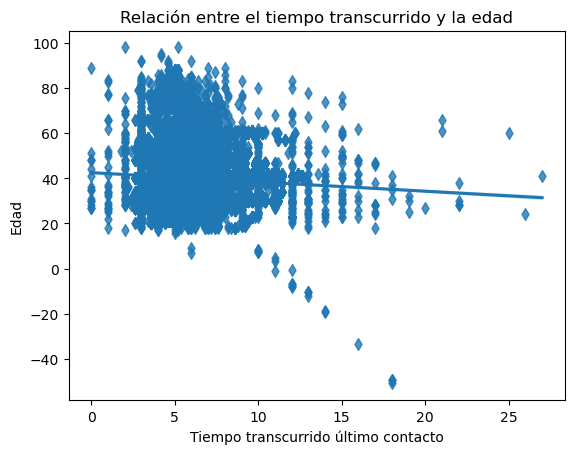

In [18]:
# creamos una gráfica usando el 'sns.regplot()' para evaluar la relación que existe entre dos variables numéricas
sns.regplot(x = "pdays", 
            y = "age", 
            data = df, 
            marker = "d")

# cambiamos los nombres de los ejes como hemos estado haciendo hasta ahora
plt.xlabel("Tiempo transcurrido último contacto")
plt.ylabel("Edad")

# ponemos título a la gráfica
plt.title("Relación entre el tiempo transcurrido y la edad");

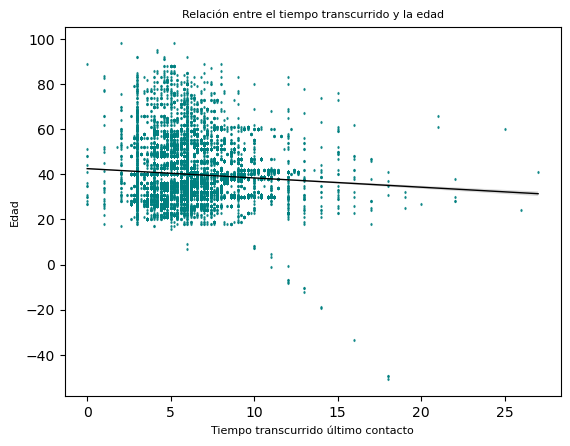

In [19]:
# Vamos a hacer algunos pequeños cambios en la gráfica creada previamente, como cambiar el color o el tamaño/grosor de los puntos/línea
# creamos una gráfica usando el 'sns.regplot()' para evaluar la relación que existe entre dos variables numéricas
sns.regplot(x = "pdays", 
            y = "age", 
            data = df, 
            marker = "d", 
            line_kws = {"color": "black", "linewidth": 1}, # cambiamos el color y el grosor de la linea de tendencia
            scatter_kws = {"color": "teal", "s": 1} # cambiamos el color y el tamaño de los puntos del scaterplot
            )

# cambiamos los nombres de los ejes como hemos estado haciendo hasta ahora
plt.xlabel("Tiempo transcurrido último contacto", fontsize = 8)
plt.ylabel("Edad", fontsize = 8)

# ponemos título a la gráfica
plt.title("Relación entre el tiempo transcurrido y la edad", fontsize = 8);

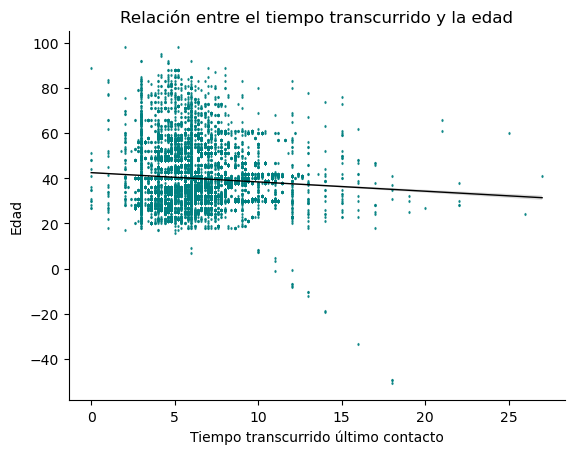

In [20]:
# VAMOS A SEGUIR MODIFICANDO ALGUNAS PROPIEDADES DE LA GRÁFICA, EN ESTE CASO, VAMOS A QUITAR LAS LÍNEAS DE ARRIBA Y DE LA DERECHA DE LA GRÁFICA. 
# creamos una gráfica usando el 'sns.regplot()' para evaluar la relación que existe entre dos variables numéricas
sns.regplot(x = "pdays", 
            y = "age", 
            data = df, 
            marker = "d", 
            line_kws = {"color": "black", "linewidth": 1}, # cambiamos el color y el grosor de la linea de tendencia
            scatter_kws = {"color": "teal", "s": 1} # cambiamos el color y el tamaño de los puntos del scaterplot
            )

# cambiamos los nombres de los ejes como hemos estado haciendo hasta ahora
plt.xlabel("Tiempo transcurrido último contacto")
plt.ylabel("Edad")

# ponemos título a la gráfica
plt.title("Relación entre el tiempo transcurrido y la edad")

# quitamos la linea de arriba y de la derecha
plt.gca().spines['right'].set_visible(False) # quitamos la línea de la derecha
plt.gca().spines["top"].set_visible(False) # quitamos la línea de arriba;

**¿Cómo podemos interpretar esta gráfica?**

Si nos fijamos esta gráfica es bastante parecida a la que sacamos en el *scatterplot*, con la pequeña diferencia de que se ha añadido la línea de tendencia que nos ha ayuda a observar mejor la relación que pueda existir entre las dos variables. En este caso vemos que la línea de tendencia es casi horizontal (lo que indicaría que no existe ninguna relación entre las dos variables estudiadas), sin embargo, parece que esta línea tiende un poco hacía abajo, es decir, que a menor edad mayor es el tiempo transcurrido desde el último contacto. 

Hasta ahora hemos estado viendo una sola gráfica dentro de un imagen, pero puede que nos interese mostrar dos o más gráficas dentro de una figura, como podemos ver en el ejemplo que vemos a continuación: 

![subplots](https://github.com/Adalab/data_imagenes/blob/main/Modulo-3/subplots.png?raw=true)

Para hacer esto usaremos el método `plt.subplots()`, el cual se utiliza para crear una figura y una o varias gráficas (subplots). Por lo tanto, este método es útil cuando se desea crear múltiples gráficos en una misma figura.

Su sintaxis básica es:

```python
fig, axes = plt.subplots(nrows, ncols, sharex=False, sharey=False, figsize=None)
```

- `nrows`: Número de filas de subplots en la figura.

- `ncols`: Número de columnas de subplots en la figura.

- `sharex` (opcional): Si es `True`, los subplots compartirán el mismo eje x.

- `sharey` (opcional): Si es `True`, los subplots compartirán el mismo eje y.

- `figsize` (opcional): Tamaño de la figura en pulgadas (ancho, alto).

Para ver un ejemplo de los subplots juntaremos en una sola figura el *scatterplot* que aprendimos en el apartado anterior y el *regplot* que hemos aprendido para poder compararlos. 

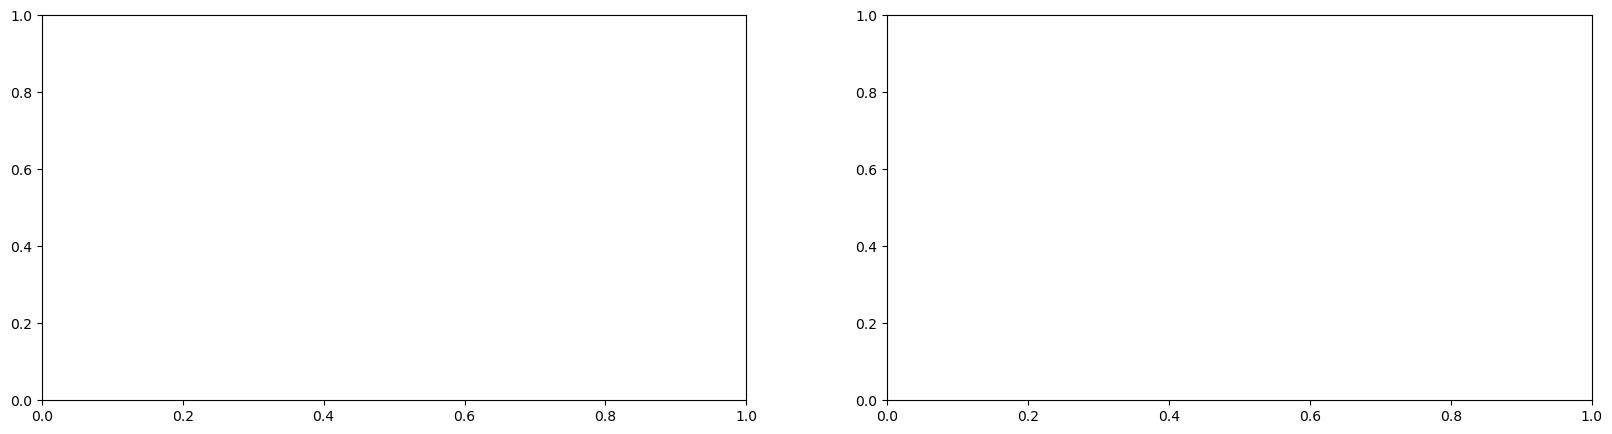

In [23]:
# establecemos el número de filas, columnas que queremos así como el tamaño que vamos a querer que tenga la figura. 
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (20, 5))

# al ejecutar esta primera línea vemos que tenemos una figura con dos gráficas en su interior. 



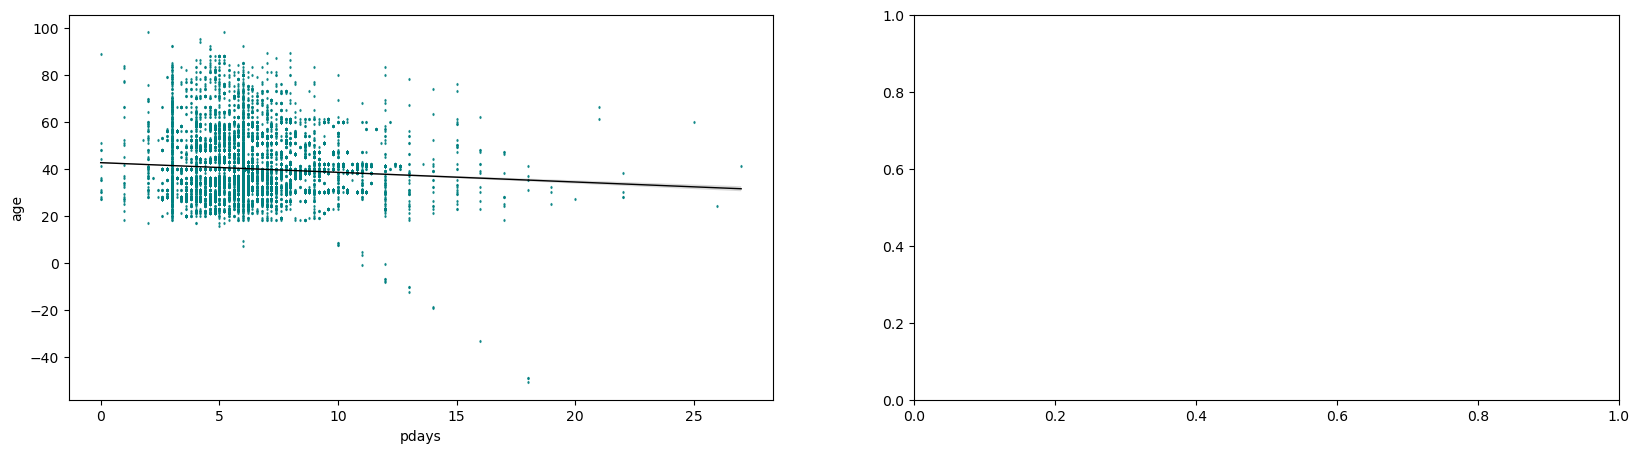

In [24]:
# establecemos el número de filas, columnas que queremos así como el tamaño que vamos a querer que tenga la figura. 
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (20, 5))

# Vamos a empezar a insertar alguna gráfica, en concreto vamos a rellenar la primera (la de la izquierda) con el regplot que creamos anteriormente
# fijaos como no cambia nada, lo único que hemos hecho ha sido añadir el parámtro 'ax' para hacer referencia en cual de los subplots lo queremos
# en este caso pondremos ax = 0, porque ya sabemos que en Python todo empieza siempre en 0. 
sns.regplot(x = "pdays", 
            y = "age", 
            data = df, 
            marker = "d", 
            line_kws = {"color": "black", "linewidth": 1}, # cambiamos el color y el grosor de la linea de tendencia
            scatter_kws = {"color": "teal", "s": 1}, # cambiamos el color y el tamaño de los puntos del scaterplot
            ax = axes[0] # especificamos el eje en el que queremos poner la gráfica. En este caso en el eje 0. 
            );

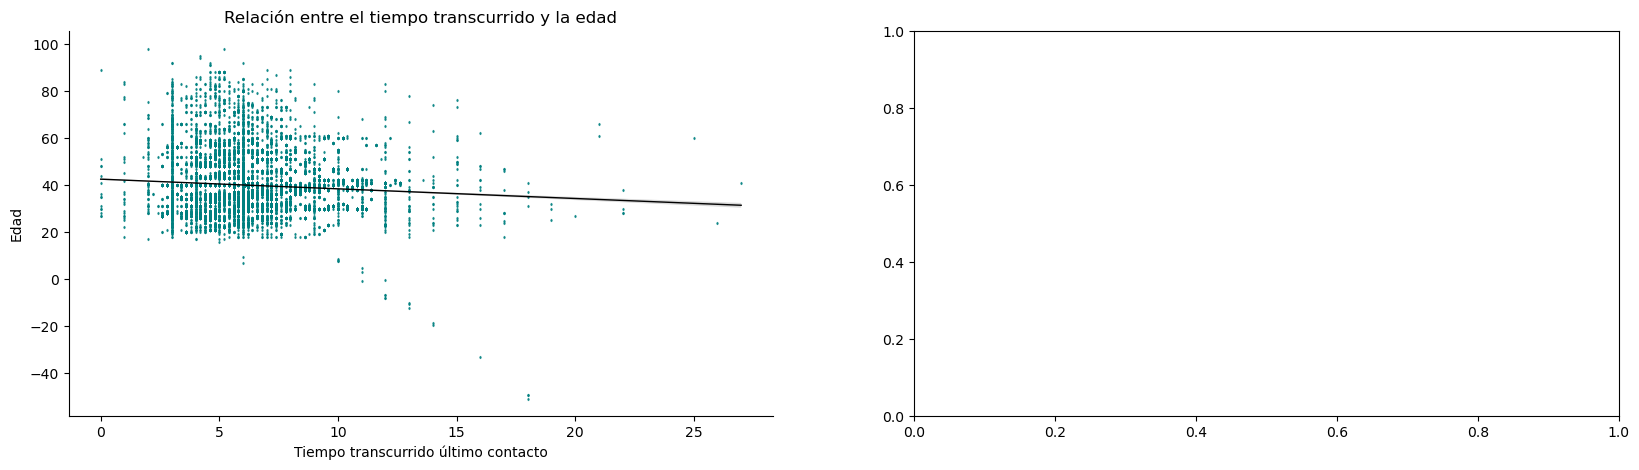

In [25]:
# YA HEMOS AÑADIDO UNA GRÁFICA EN NUESTRO SUBPLOT, PERO NO TIENE NINGUNA DE LAS MODIFICACIONES QUE HICIMOS EN LA ORIGINAL.
# establecemos el número de filas, columnas que queremos así como el tamaño que vamos a querer que tenga la figura. 
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (20, 5))

# Vamos a empezar a insertar alguna gráfica, en concreto vamos a rellenar la primera (la de la izquierda) con el regplot que creamos anteriormente
# fijaos como no cambia nada, lo unico que hemos hecho ha sido añadir el parémtro 'ax' para hacer referencia en cual de los subplots lo queremos
# en este caso pondremos ax = 0, porque ya sabemos que en Python todo empieza siempre en 0. 
sns.regplot(x = "pdays", y = "age", data = df, 
            marker = "d", 
            line_kws = {"color": "black", "linewidth": 1}, # cambiamos el color y el grosor de la linea de tendencia
            scatter_kws = {"color": "teal", "s": 1}, # cambiamos el color y el tamaño de los puntos del scaterplot
            ax = axes[0] # especificamos el eje en el que queremos poner la gráfica. En este caso en el eje 0. 
            )

# para añadir un título usaremos el parámetro '.set_title()' 
axes[0].set_title("Relación entre el tiempo transcurrido y la edad")

# cambiamos el nombre del eje x e y usando el método '.set_xlabel()' y '.set_ylabel()' respectivamente. 
axes[0].set_xlabel("Tiempo transcurrido último contacto")

# cambiamos el nombre de los ejes usando los métodos
axes[0].set_ylabel("Edad")

# quitamos la linea de la derecha de la gráfica
axes[0].spines['right'].set_visible(False)

# quitamos la linea de la derecha de la gráfica
axes[0].spines['top'].set_visible(False);



Ya tenemos una de las gráficas de nuestro subplot, vamos a añadir la segunda, que recordemos es el *scatterplot*, como podréis imaginar lo único que tendremos que hacer es añadir el parámetro 'ax' en la gráfica que creamos previamente. 

''

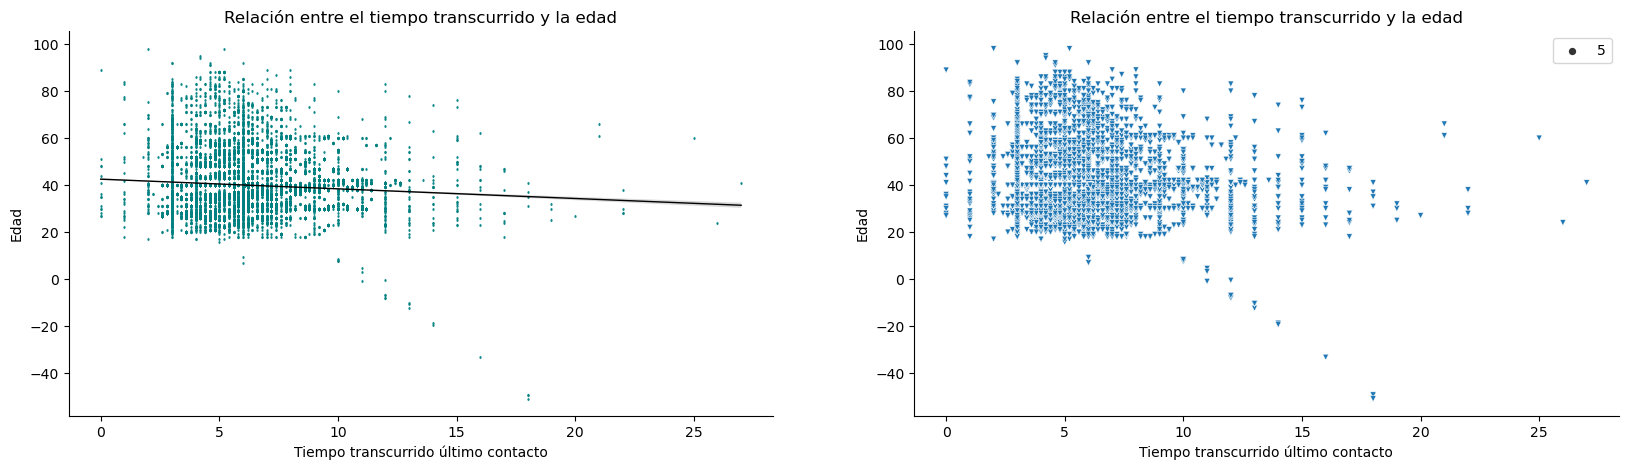

In [26]:
# YA HEMOS AÑADIDO UNA GRÁFICA EN NUESTRO SUBPLOT, PERO NO TIENE NINGUNA DE LAS MODIFICACIONES QUE HICIMOS EN LA ORIGINAL.
# establecemos el número de filas, columnas que queremos así como el tamaño que vamos a querer que tenga la figura. 
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (20, 5))

# Vamos a empezar a insertar alguna gráfica, en concreto vamos a rellenar la primera (la de la izquierda) con el regplot que creamos anteriormente
# fijaos como no cambia nada, lo unico que hemos hecho ha sido añadir el parémtro 'ax' para hacer referencia en cual de los subplots lo queremos
# en este caso pondremos ax = 0, porque ya sabemos que en Python todo empieza siempre en 0. 
sns.regplot(x = "pdays", y = "age", data = df, 
            marker = "d", 
            line_kws = {"color": "black", "linewidth": 1}, # cambiamos el color y el grosor de la linea de tendencia
            scatter_kws = {"color": "teal", "s": 1}, # cambiamos el color y el tamaño de los puntos del scaterplot
            ax = axes[0] # especificamos el eje en el que queremos poner la gráfica. En este caso en el eje 0. 
            )

# para añadir un título usaremos el parámetro '.set_title()' 
axes[0].set_title("Relación entre el tiempo transcurrido y la edad")

# cambiamos el nombre del eje x e y usando el método '.set_xlabel()' y '.set_ylabel()' respectivamente. 
axes[0].set_xlabel("Tiempo transcurrido último contacto")

# cambiamos el nombre de los ejes usando los métodos
axes[0].set_ylabel("Edad")

# quitamos la linea de la derecha de la gráfica
axes[0].spines['right'].set_visible(False)

# quitamos la linea de la derecha de la gráfica
axes[0].spines['top'].set_visible(False)


# AÑADIMOS LA INFORMACIÓN QUE QUEREMOS EN EL SEGUNDO SUBPLOT, AÑADIENDO EL PARÁMETRO 'AX'. En este caso pondremos ax = axes[1] porque queremos que vaya en el segundo subplot. 
sns.scatterplot(x = "pdays", y = "age", data = df, 
                size = 5, 
                marker= "v", 
                ax = axes[1])

# para añadir un título usaremos el parámetro '.set_title()' 
axes[1].set_title("Relación entre el tiempo transcurrido y la edad")

# cambiamos el nombre del eje x e y usando el método '.set_xlabel()' y '.set_ylabel()' respectivamente. 
axes[1].set_xlabel("Tiempo transcurrido último contacto")

# cambiamos el nombre de los ejes usando los métodos
axes[1].set_ylabel("Edad")


# quitamos la linea de la derecha de la gráfica
axes[1].spines['right'].set_visible(False)

# quitamos la linea de la derecha de la gráfica
axes[1].spines['top'].set_visible(False)
;

## Gráfico de cajas o *boxplot* y *violinplot*

> ¿Existen valores atípicos en la cantidad de contactos realizados durante la campaña publicitaria? Boxplot de la variable "campaign": Este gráfico nos ayudaría a identificar la distribución de la cantidad de contactos realizados durante la campaña publicitaria, así como a identificar posibles valores atípicos.

Como ya hemos aprendido los subplots, haremos las gráficas de seaborn y de matplotlib a la vez en una misma figura. 

### Boxplot

**La sintaxis de un boxplot en Seaborn es:** 

```python
sns.boxplot(x, y, data, hue, width, palette, color  )
```

**La sintaxis de un boxplot en Marplotlib es:**

```python
plt.boxplot(x, y, data=data, widths, hue, labels, boxprops )
```


''

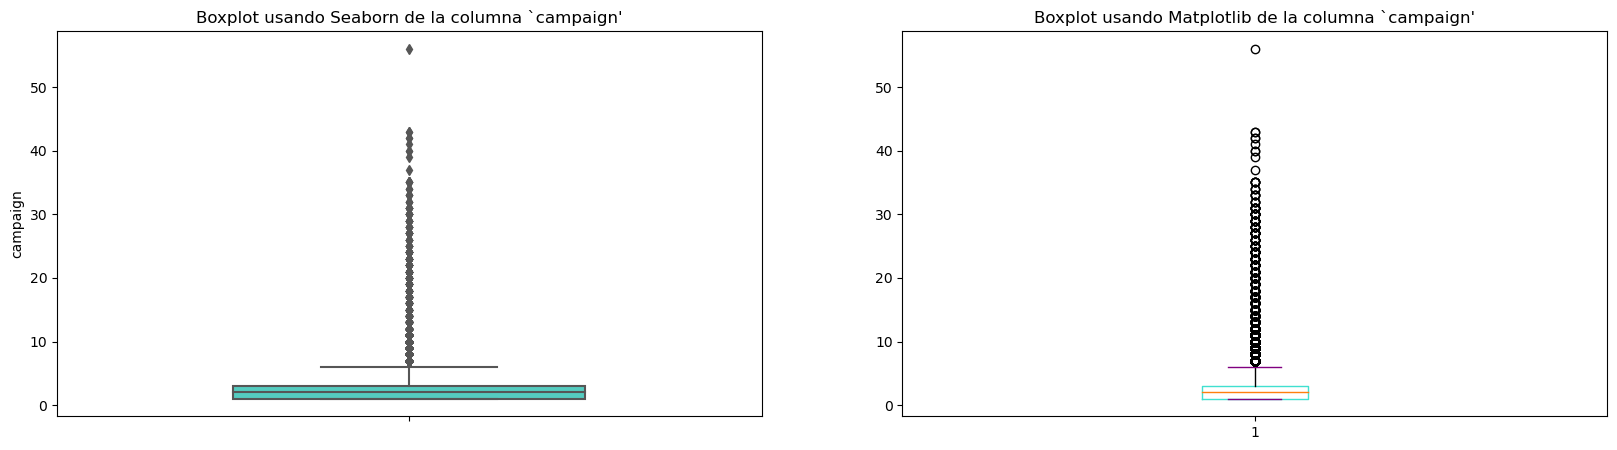

In [24]:
# empezamos creando el subplot con el número de gráficas deseadas en su interior
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (20, 5))

# añadimos un boxplot creado con Seaborn usando el método 'sns.boxplot()'
sns.boxplot(y = "campaign", 
            data = df, 
            width = 0.5, 
            color = "turquoise", 
            ax = axes[0])

# añadimos un título a esta primera gráfica usando el método '.set_title()
axes[0].set_title("Boxplot usando Seaborn de la columna `campaign'")


# CREAMOS EL BOXPLOT USANDO MATPLOTLIB
# creamos el boxplot usando Matplotlib. Fijaos como en el caso de Matplotlib no incluimos el parámetro 'ax' dentro de la función de la grafica
# en este caso lo ponemos al inicio de la gráfica (en vez de poner plt.boxplot() ponemos el eje donde queremos que este la gráfica. 
axes[1].boxplot(x = "campaign", 
                data = df, 
                boxprops = {"color": "turquoise"}, # cambiamos el color de la linea del boxplot 
                capprops={'color':'purple'}) # para cambiar el color de los bigotes)

# añadimos el título a la segunda gráfica
axes[1].set_title("Boxplot usando Matplotlib de la columna `campaign'")
;

**¿Cómo interpretamos las gráficas?**

- Lo primero que vemos es que independientemente de la librería que usemos, las dos gráficas nos muestran lo mismo. 

- También es cierto que al ver esta gráfica, lo primero que observamos a primera vista es que tenemos una grán cantidad de *outliers*, lo que hace que no podamos visualizar correctamente la caja del boxplot y que no podamos sacar conclusiones. 

Usando Matplotlib tenemos los métodos `xlim()` e `ylim()` que nos permite limitar los ejes de las gráficas. Los métodos `xlim()` y `ylim()` en Matplotlib se utilizan para establecer los límites de los ejes x e y, respectivamente, en un gráfico. Estos métodos te permiten controlar qué rango de valores se mostrará en los ejes, lo que puede ser útil para enfocarnos en una región específica de los datos o para mejorar la comparación entre diferentes gráficos.

Su sintaxis es: 

```python
# en caso de que estemos trabajando con gráficas individuales
plt.xlim([valor_min, valor_max])
plt.ylim([valor_min, valor_max])

# al igual que en los otros métodos, cuando queremos incluirlo en subplots es un poco diferente, en este caso usaremos:
axes[n].set_xlim()
axes[n].set_ylim()
```
Donde: 

- `valor_min`: Valor mínimo del límite del eje.

- `valor_max`: Valor máximo del límite del eje.

En nuestro caso vamos a cambiar el límite del eje de la `y` para acotarlo y poder ver la caja de los boxplots. 

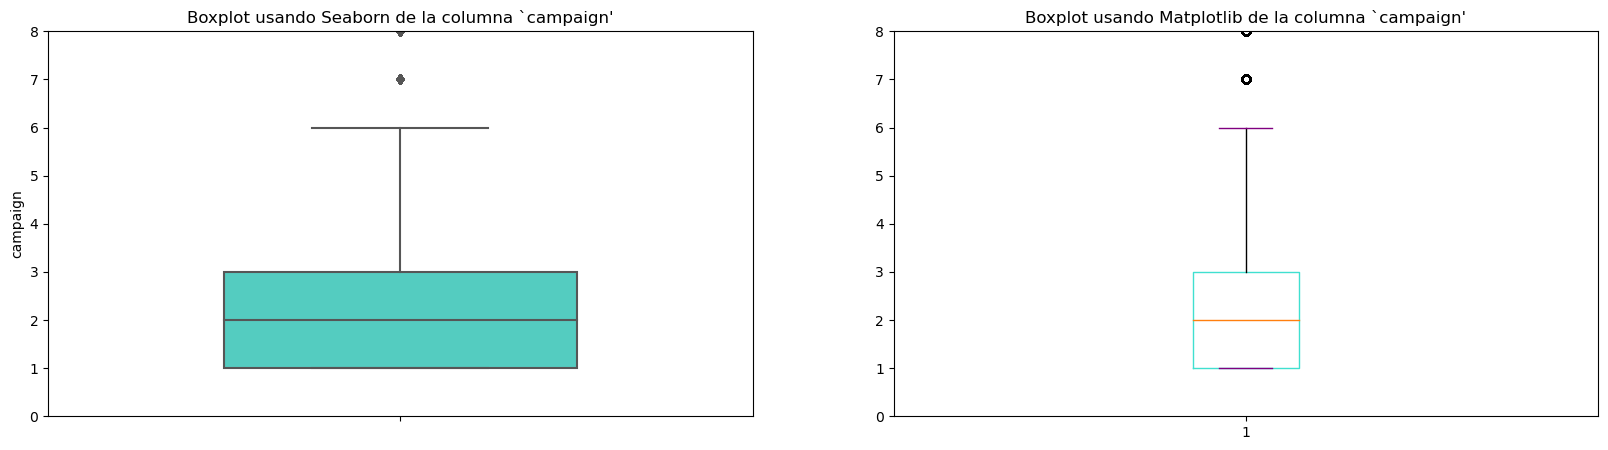

In [25]:
# empezamos creando el subplot con el número de gráficas deseadas en su interior
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (20, 5))

# añadimos un boxplot creado con Seaborn usando el método 'sns.boxplot()'
sns.boxplot(y = "campaign", 
            data = df, 
            width = 0.5, 
            color = "turquoise", 
            ax = axes[0])

# añadimos un título a esta primera gráfica usando el método '.set_title()
axes[0].set_title("Boxplot usando Seaborn de la columna `campaign'")

# cambiamos el límite del eje y
axes[0].set_ylim([0, 8])

# CREAMOS EL BOXPLOT USANDO MATPLOTLIB
# creamos el boxplot usando Matplotlib. Fijaos como en el caso de Matplotlib no incluimos el parámetro 'ax' dentro de la función de la grafica
# en este caso lo ponemos al inicio de la gráfica (en vez de poner plt.boxplot() ponemos el eje donde queremos que este la gráfica. 
axes[1].boxplot(x = "campaign", 
                data = df, 
                boxprops = {"color": "turquoise"}, # cambiamos el color de la linea del boxplot 
                 capprops={'color':'purple'}) # para cambiar el color de los bigotes)

# añadimos el título a la segunda gráfica
axes[1].set_title("Boxplot usando Matplotlib de la columna `campaign'")

# cambiamos el límite del eje y
axes[1].set_ylim([0,8]);


**Cómo interpretamos los resultados?**

![boxplot](https://github.com/Adalab/data_imagenes/blob/main/Modulo-3/boxplot.png?raw=true)




En otras palabras: 

- El Q1 es el valor que separa los valores más bajos del 25% más bajo de los datos en una distribución. Es una medida de la tendencia central que indica dónde se encuentra el límite inferior de los valores centrales de los datos. El Q1 es útil para comprender la dispersión de los datos y para detectar valores atípicos o extremadamente bajos en la distribución.

- El Q3 es el valor que separa los valores más altos del 25% más alto de los datos en una distribución. Es una medida de la tendencia central que indica dónde se encuentra el límite superior de los valores centrales de los datos. Al igual que el Q1, el Q3 es útil para comprender la dispersión de los datos y detectar valores atípicos o extremadamente altos en la distribución.

El cálculo del Q1 y el Q3 implica ordenar los datos de menor a mayor y encontrar el valor que se encuentra en la posición que corresponde al 25 y el 75% del total de los datos.

Por lo tanto, podemos concluir que: 

- El 25% de los clientes menos de una llamada. 

- El 75% de los clientes reciben menos de 3 llamadas, o lo que es lo mismo, que el 25% de los clientes reciben más de 3 llamadas. 



### Violinplot

La representación gráfica de un violin plot es una forma de visualizar la distribución de datos numéricos en diferentes categorías o grupos. 

Como es una gráfica muy similar al *boxplot* contestaremos a la misma pregunta para poder entender bien las diferencias entre una gráfica y otra. La pregunta es: 

> ¿Existen valores atípicos en la cantidad de contactos realizados durante la campaña publicitaria? Boxplot de la variable "campaign": Este gráfico nos ayudaría a identificar la distribución de la cantidad de contactos realizados durante la campaña publicitaria, así como a identificar posibles valores atípicos.

📌 Recordad que esto lo estamos haciendo para `campaign`, pero lo podríamos hacer para cualquiera de las variables numéricas que tenemos en el conjunto de datos. 

Su sintaxis básica es:

```python
# Crear un violin plot
sns.violinplot(x, y, data, color, palette, linewidth)
```


(0.0, 10.0)

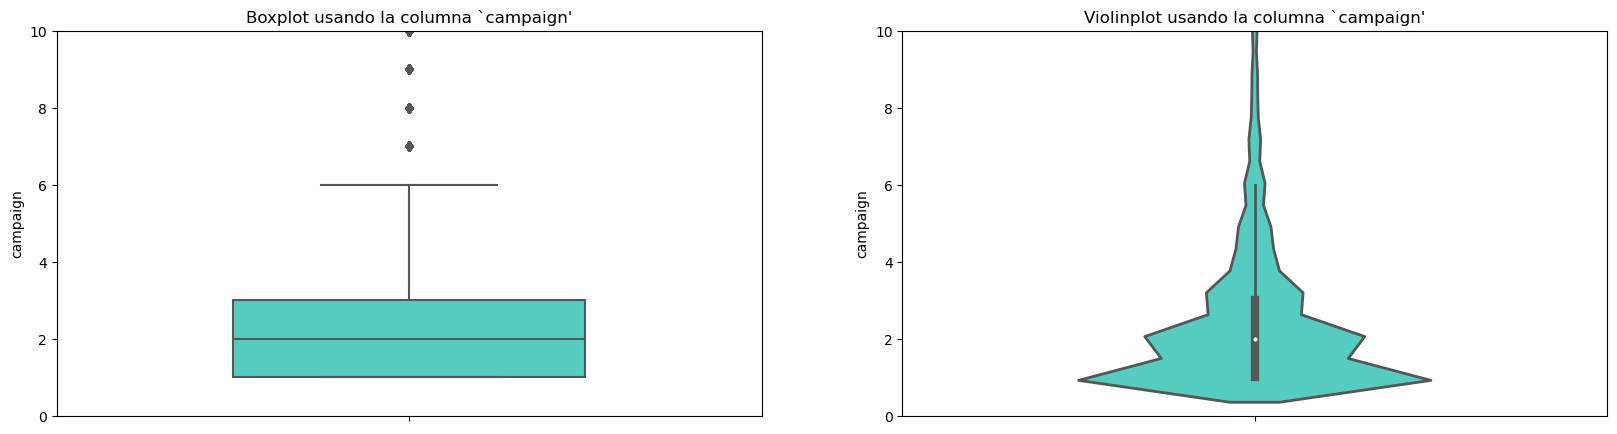

In [29]:
# de nuevo vamos a hacer una figura con dos gráficas en su interior, una con el boxplot y otra con el violinplot para compararlas

# empezamos creando el subplot con el número de gráficas deseadas en su interior
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (20, 5))

# añadimos un boxplot usando el método 'sns.boxplot()'
sns.boxplot(y = "campaign", 
            data = df, 
            width = 0.5, 
            color = "turquoise", 
            ax = axes[0])

# añadimos un título a esta primera gráfica usando el método '.set_title()
axes[0].set_title("Boxplot usando la columna `campaign'")


# CREAMOS EL VIOLINPLOT USANDO SEABORN
# añadimos un violinplot usando el método 'sns.violinplot()'. COMO ES SEABORN, USAMOS EL PARÁMETRO 'ax' PARA INDICAR EN QUE EJE DE LA FIGURA LO QUEREMOS 
sns.violinplot(y = "campaign", 
               data = df, 
               width = 0.5, 
               color = "turquoise", 
               linewidth = 2, 
               ax = axes[1])

# añadimos un título a esta primera gráfica usando el método '.set_title()
axes[1].set_title("Violinplot usando la columna `campaign'")


# como ya sabemos que tenemos muchos outliers, vamos a usar el método '.set_ylim()' para "eliminar" los valores atípicos de la visualización
axes[0].set_ylim([0,10])
axes[1].set_ylim([0,10])



**Cómo interpretar un violin plot:**

- **Forma del violin:** La forma del violin proporciona información sobre la distribución de los datos. Un violin simétrico indica una distribución simétrica, mientras que un violin asimétrico puede indicar sesgo en los datos. En nuestro caso, el violín es asimétrico, ya que la parte de abajo es completamente plana y la de arriba tiene una cola muy larga indicando los *outliers*. 

- **Densidad de datos:** La anchura del violin en diferentes puntos muestra la densidad de datos en esas ubicaciones. Un violin más ancho indica una mayor densidad de datos en esa parte de la distribución, es decir, que tenemos mayor cantidad de datos en esos valores. Esto es algo añadido que no 

- **Valores atípicos:** Al igual que en un boxplot, los valores atípicos se pueden identificar por puntos fuera del rango de la caja y los bigotes, en este caso los bigotes corresponden con las colas del violín. 

Además en un *violinplot* tenemos: 

- El punto blanco, que corresponde con la mediana. 

- La linea gorda negra, que corresponde con el Q1 y el Q3 que hemos explicado previamente. 